# Relax Project

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period.      
Identify which factors predict future user adoption

**name:** the user's name    
**object_id:** the user's id    
**email:** email address    
**creation_source:** how their account was created. This takes on one of 5 values:    
**○ PERSONAL_PROJECTS:** invited to join another user's personal workspace    
**○ GUEST_INVITE:** invited to an organization as a guest (limited permissions)    
**○ ORG_INVITE:** invited to an organization (as a full member)    
**○ SIGNUP:** signed up via the website      
**○ SIGNUP_GOOGLE_AUTH:** signed up using Google Authentication(using a Google email account for their login id)      
**creation_time:** when they created their account            
**last_session_creation_time:** unix timestamp of last login          
**opted_in_to_mailing_list:** whether they have opted into receiving marketing emails           
**enabled_for_marketing_drip:** whether they are on the regular marketing email drip        
**org_id:** the organization (group of users) they belong to        
**invited_by_user_id:** which user invited them to join (if applicable)        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\vikag\Desktop\ONGOING!!!!\relax_challenge\takehome_users.csv',
                 encoding = 'latin-1',parse_dates=['creation_time'])

df_e = pd.read_csv(r'C:\Users\vikag\Desktop\ONGOING!!!!\relax_challenge\takehome_user_engagement.csv',
                   encoding = 'latin-1', parse_dates=['time_stamp'])

In [3]:
df.head(4).T

,0,1,2,3
object_id,1,2,3,4
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0,1369210168.0
opted_in_to_mailing_list,1,0,0,0
enabled_for_marketing_drip,0,0,0,0
org_id,11,1,94,1
invited_by_user_id,10803.0,316.0,1525.0,5151.0


In [4]:
df_e.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [6]:
df_e.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [7]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


# WRANGLING

In [9]:
df_e['date'] = pd.to_datetime(df_e['time_stamp'].dt.date)
df_e.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [10]:
seven = df_e.groupby('user_id').rolling('7D', on='date').count()
active7 = seven[seven['visited'] >= 3]
active7.head()

time_stamp  visited       date
user_id                                   
2       9          3.0      3.0 2014-02-09
        10         3.0      3.0 2014-02-13
10      27         3.0      3.0 2013-02-19
        30         3.0      3.0 2013-03-02
        31         3.0      3.0 2013-03-05

In [11]:
a_id = active7.index.get_level_values(0).unique()
df['adopted_user'] = np.where((df['object_id'].isin(a_id)),1,0)
df_clean = df
df_clean.head(4).T

,0,1,2,3
object_id,1,2,3,4
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0,1369210168.0
opted_in_to_mailing_list,1,0,0,0
enabled_for_marketing_drip,0,0,0,0
org_id,11,1,94,1
invited_by_user_id,10803.0,316.0,1525.0,5151.0


# EDA

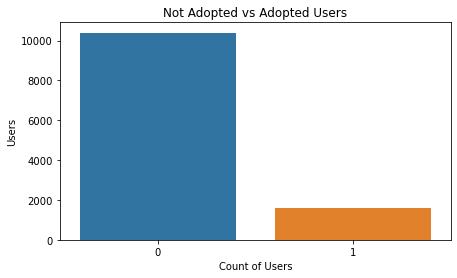

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(x='adopted_user', data=df_clean)
plt.title('Not Adopted vs Adopted Users')
plt.xlabel('Count of Users')
plt.ylabel('Users');

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='if_invited', data=users, hue='adopted')

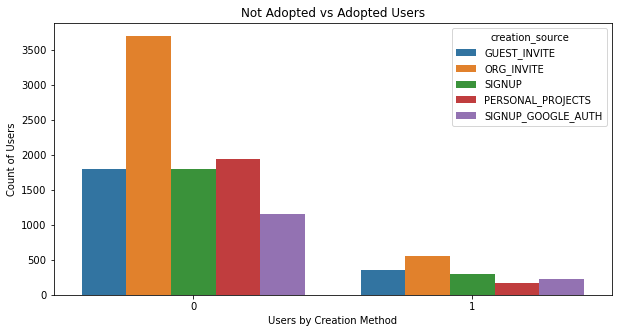

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='adopted_user', data=df_clean, hue='creation_source')
plt.title('Not Adopted vs Adopted Users')
plt.ylabel('Count of Users')
plt.xlabel('Users by Creation Method');

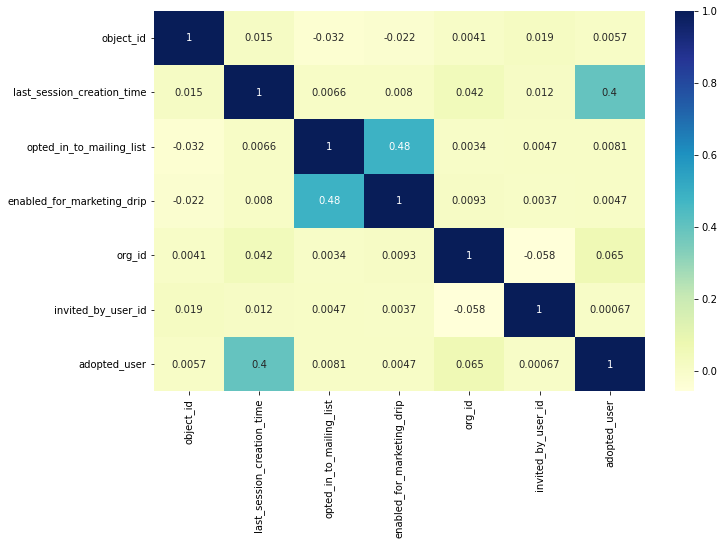

In [14]:
sns.heatmap(df_clean.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

# MODELING

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [16]:
df_modeling = df_clean.drop_duplicates().drop(['name','creation_time','email'], axis=1)

In [17]:
df_modeling.head().T

,0,1,2,3,4
object_id,1,2,3,4,5
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE,GUEST_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0,1369210168.0,1358849660.0
opted_in_to_mailing_list,1,0,0,0,0
enabled_for_marketing_drip,0,0,0,0,0
org_id,11,1,94,1,193
invited_by_user_id,10803.0,316.0,1525.0,5151.0,5240.0
adopted_user,0,1,0,0,0


In [20]:
df_c = df_modeling

In [21]:
df_c.creation_source = LabelEncoder().fit_transform(df_c.creation_source)

In [24]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  int32  
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          6417 non-null   float64
 7   adopted_user                12000 non-null  int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 750.0 KB


In [25]:
df_c.isna().sum()

object_id                        0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [26]:
df_c = df_c.dropna(axis='columns')
df_c.isna().sum()

object_id                     0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
adopted_user                  0
dtype: int64

In [27]:
X = df_c.drop(columns = ['adopted_user'])
y = df_c['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

LR_M = LogisticRegression()

LR_M.fit(X_train, y_train)

print(accuracy_score(LR_M.predict(X_test), y_test))

0.8541666666666666


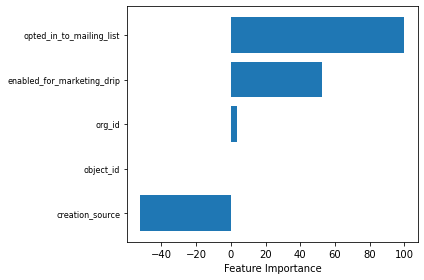

In [28]:
feature_importance = (LR_M.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Feature Importance')

plt.tight_layout()   
plt.show()